In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_chamfer import MCUChamferModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [5]:
figure_num = 16**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([10, -75])
up = np.array([170, 75])
param_names = np.array(["inside_angle", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUChamferModel(k=10, c=0.1, figures=figures, params=control_vars, params_names=param_names)


In [6]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

rre_median_embedding_vs_params: 0.0008941255297212885


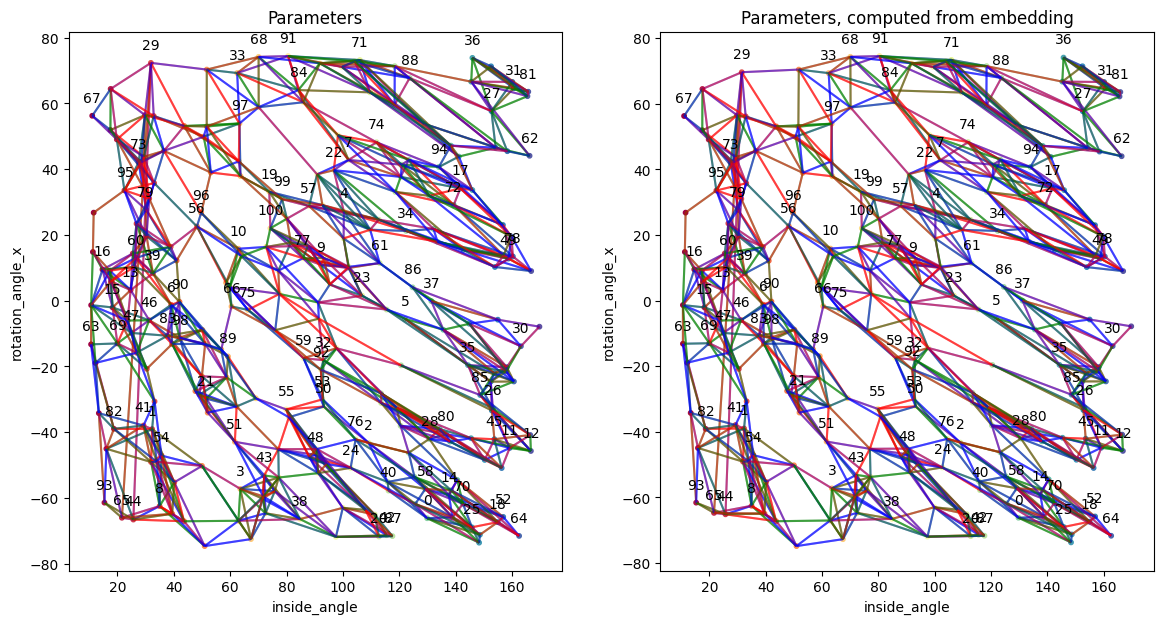

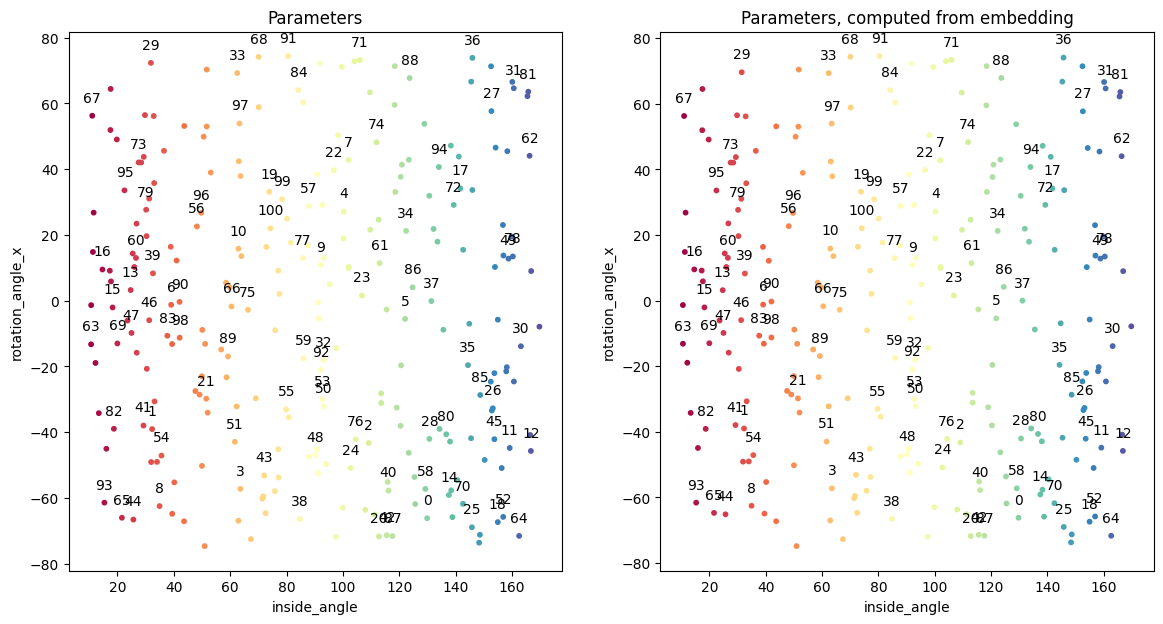

In [7]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [9]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt = 200, noise_level = 0, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 124 ms , optimization: 0 ms
-----------
x_opt  = [ 78.53226722 -52.5147549 ], x_err = 0.9517748984954271
x_real = [ 18.4256245  -60.29013054]
Finding neighbors: 128 ms , optimization: 0 ms
-----------
x_opt  = [ 97.96186159 -45.84963309], x_err = 1.2713478165030943
x_real = [ 15.52338672 -73.94576371]
Finding neighbors: 125 ms , optimization: 0 ms
-----------
x_opt  = [ 97.70072387 -51.52485848], x_err = 0.9145880768158796
x_real = [ 10.30924214 -66.96777473]
Finding neighbors: 124 ms , optimization: 0 ms
-----------
x_opt  = [ 99.03895886 -51.41273501], x_err = 1.0245541019756215
x_real = [ 11.95223092 -61.13258233]
Finding neighbors: 125 ms , optimization: 0 ms
-----------
x_opt  = [ 76.11519028 -41.07005559], x_err = 1.2952057471866072
x_real = [ 19.10106643 -65.25064634]
Finding neighbors: 124 ms , optimization: 0 ms
-----------
x_opt  = [ 97.5752591  -51.65132608], x_err = 1.0083727212445288
x_real = [ 15.25450426 -63.67010553]
Finding neighbors: 124 ms , optimi

In [10]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt = 200, noise_level = 0, pieces_cnt=10, test_data_size=20, same_value=False, baseline=True)

-----------
x_opt  = [ 21.5800268  -66.00333839], x_err = 1.330473776263963
x_real = [ 23.34714174 -71.38974551]
-----------
x_opt  = [ 21.5800268  -66.00333839], x_err = 2.295732430337241
x_real = [ 18.12777089 -71.06398446]
-----------
x_opt  = [ 25.64344255 -66.55481997], x_err = 0.007195041886066632
x_real = [ 23.93203499 -63.27058634]
-----------
x_opt  = [ 15.3788767  -61.41202082], x_err = 3.265373243390778
x_real = [ 11.65599092 -74.39691326]
-----------
x_opt  = [ 15.3788767  -61.41202082], x_err = 2.911319516735731
x_real = [ 11.93469592 -66.79231628]
-----------
x_opt  = [ 15.3788767  -61.41202082], x_err = 2.5959694345820825
x_real = [ 16.28776538 -60.35939914]
-----------
x_opt  = [ 21.5800268  -66.00333839], x_err = 3.096460085941939
x_real = [ 15.55544524 -73.96367092]
-----------
x_opt  = [ 25.64344255 -66.55481997], x_err = 0.010150191451765291
x_real = [ 25.8887546  -62.01468668]
-----------
x_opt  = [ 15.3788767  -61.41202082], x_err = 2.5590444612918617
x_real = [ 1

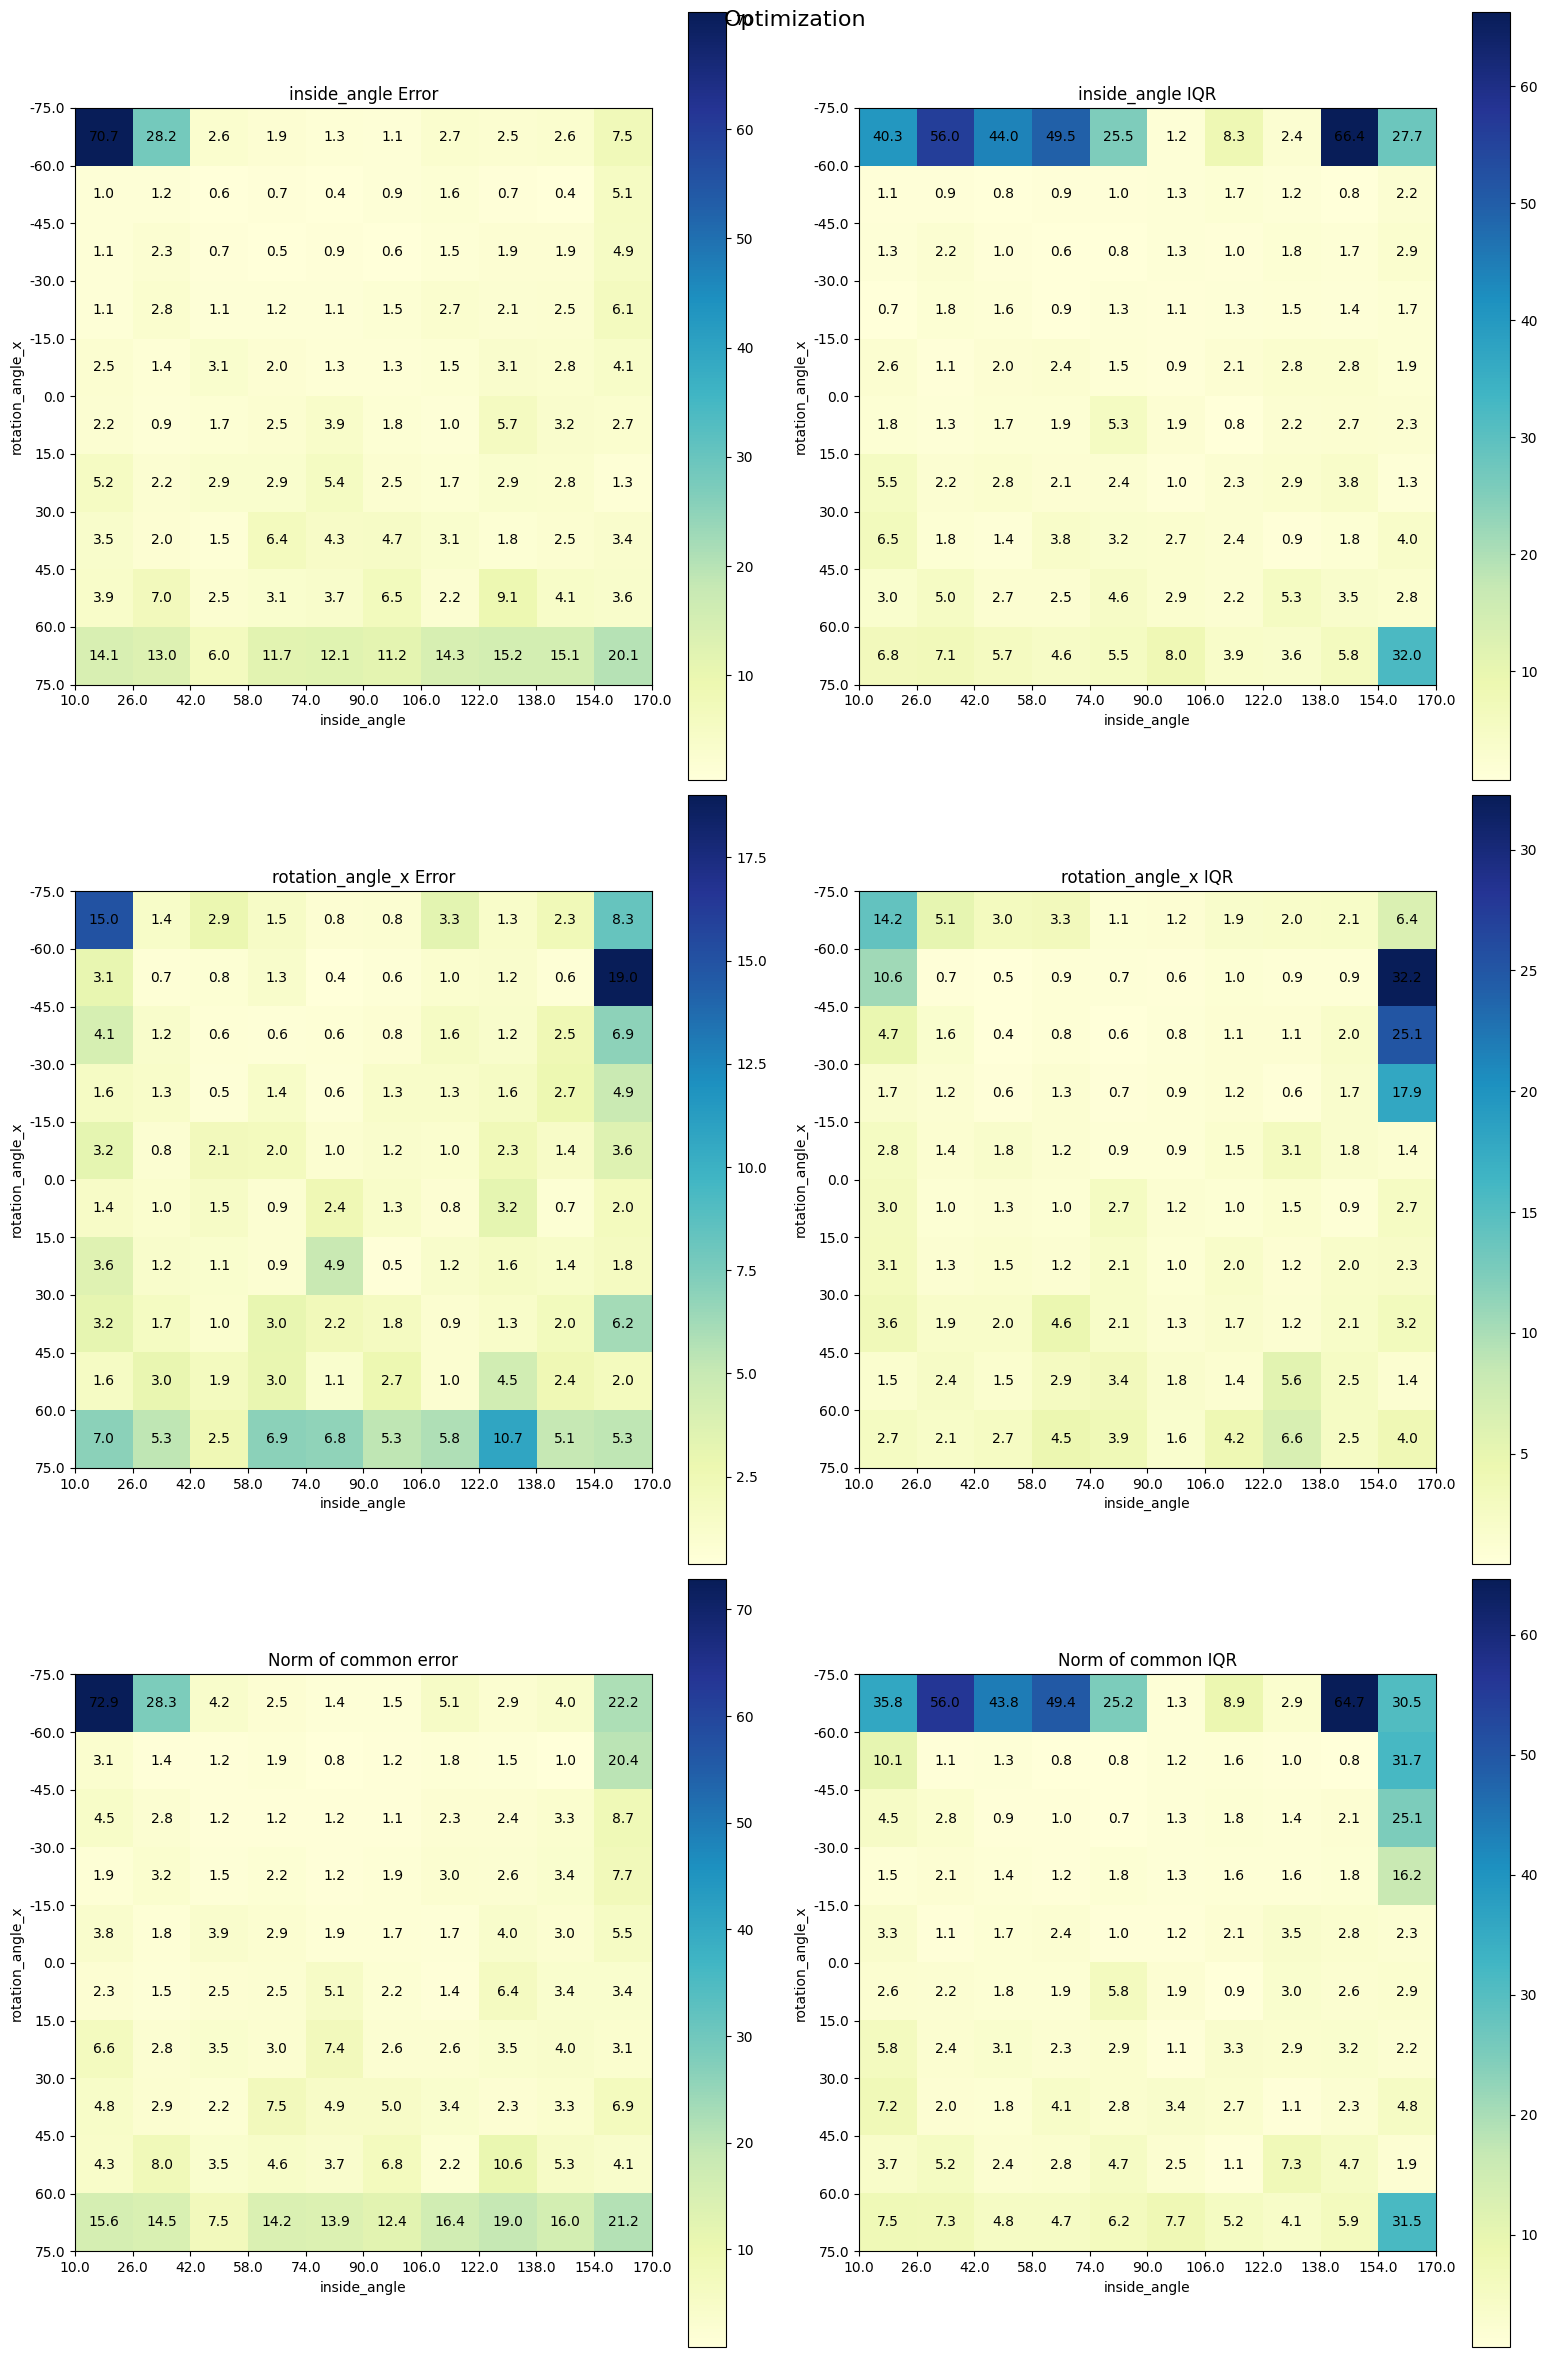

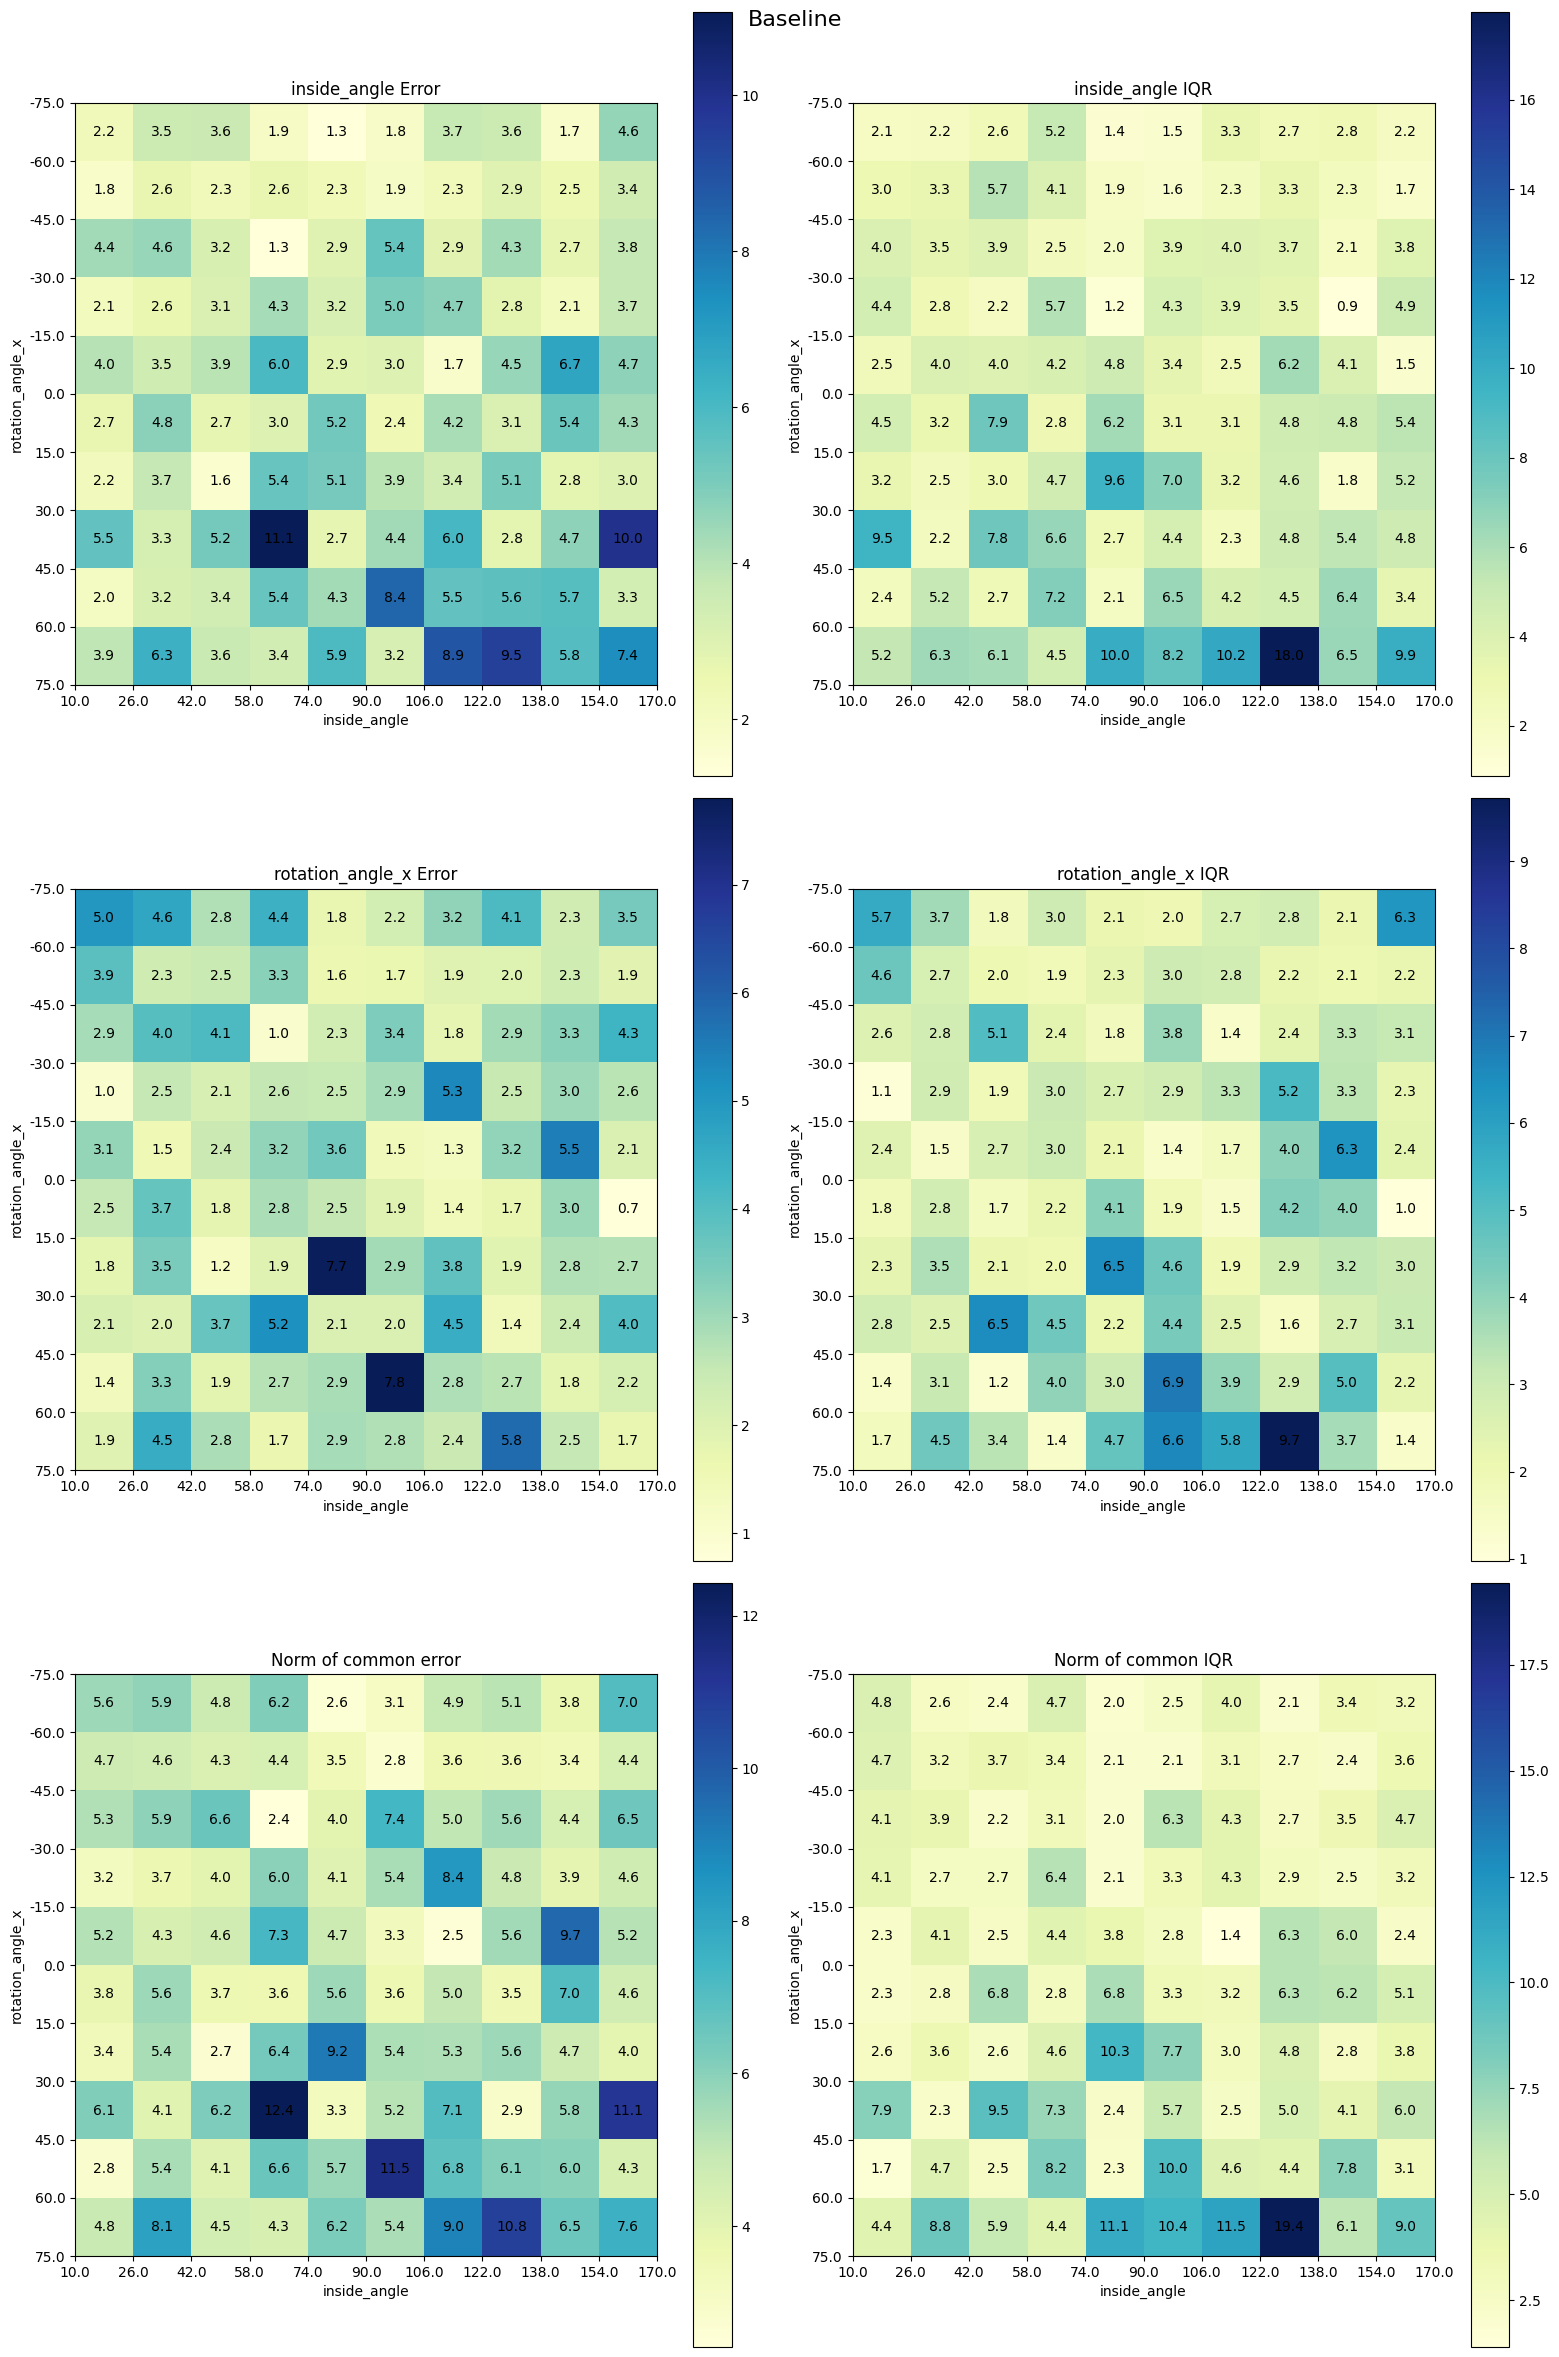

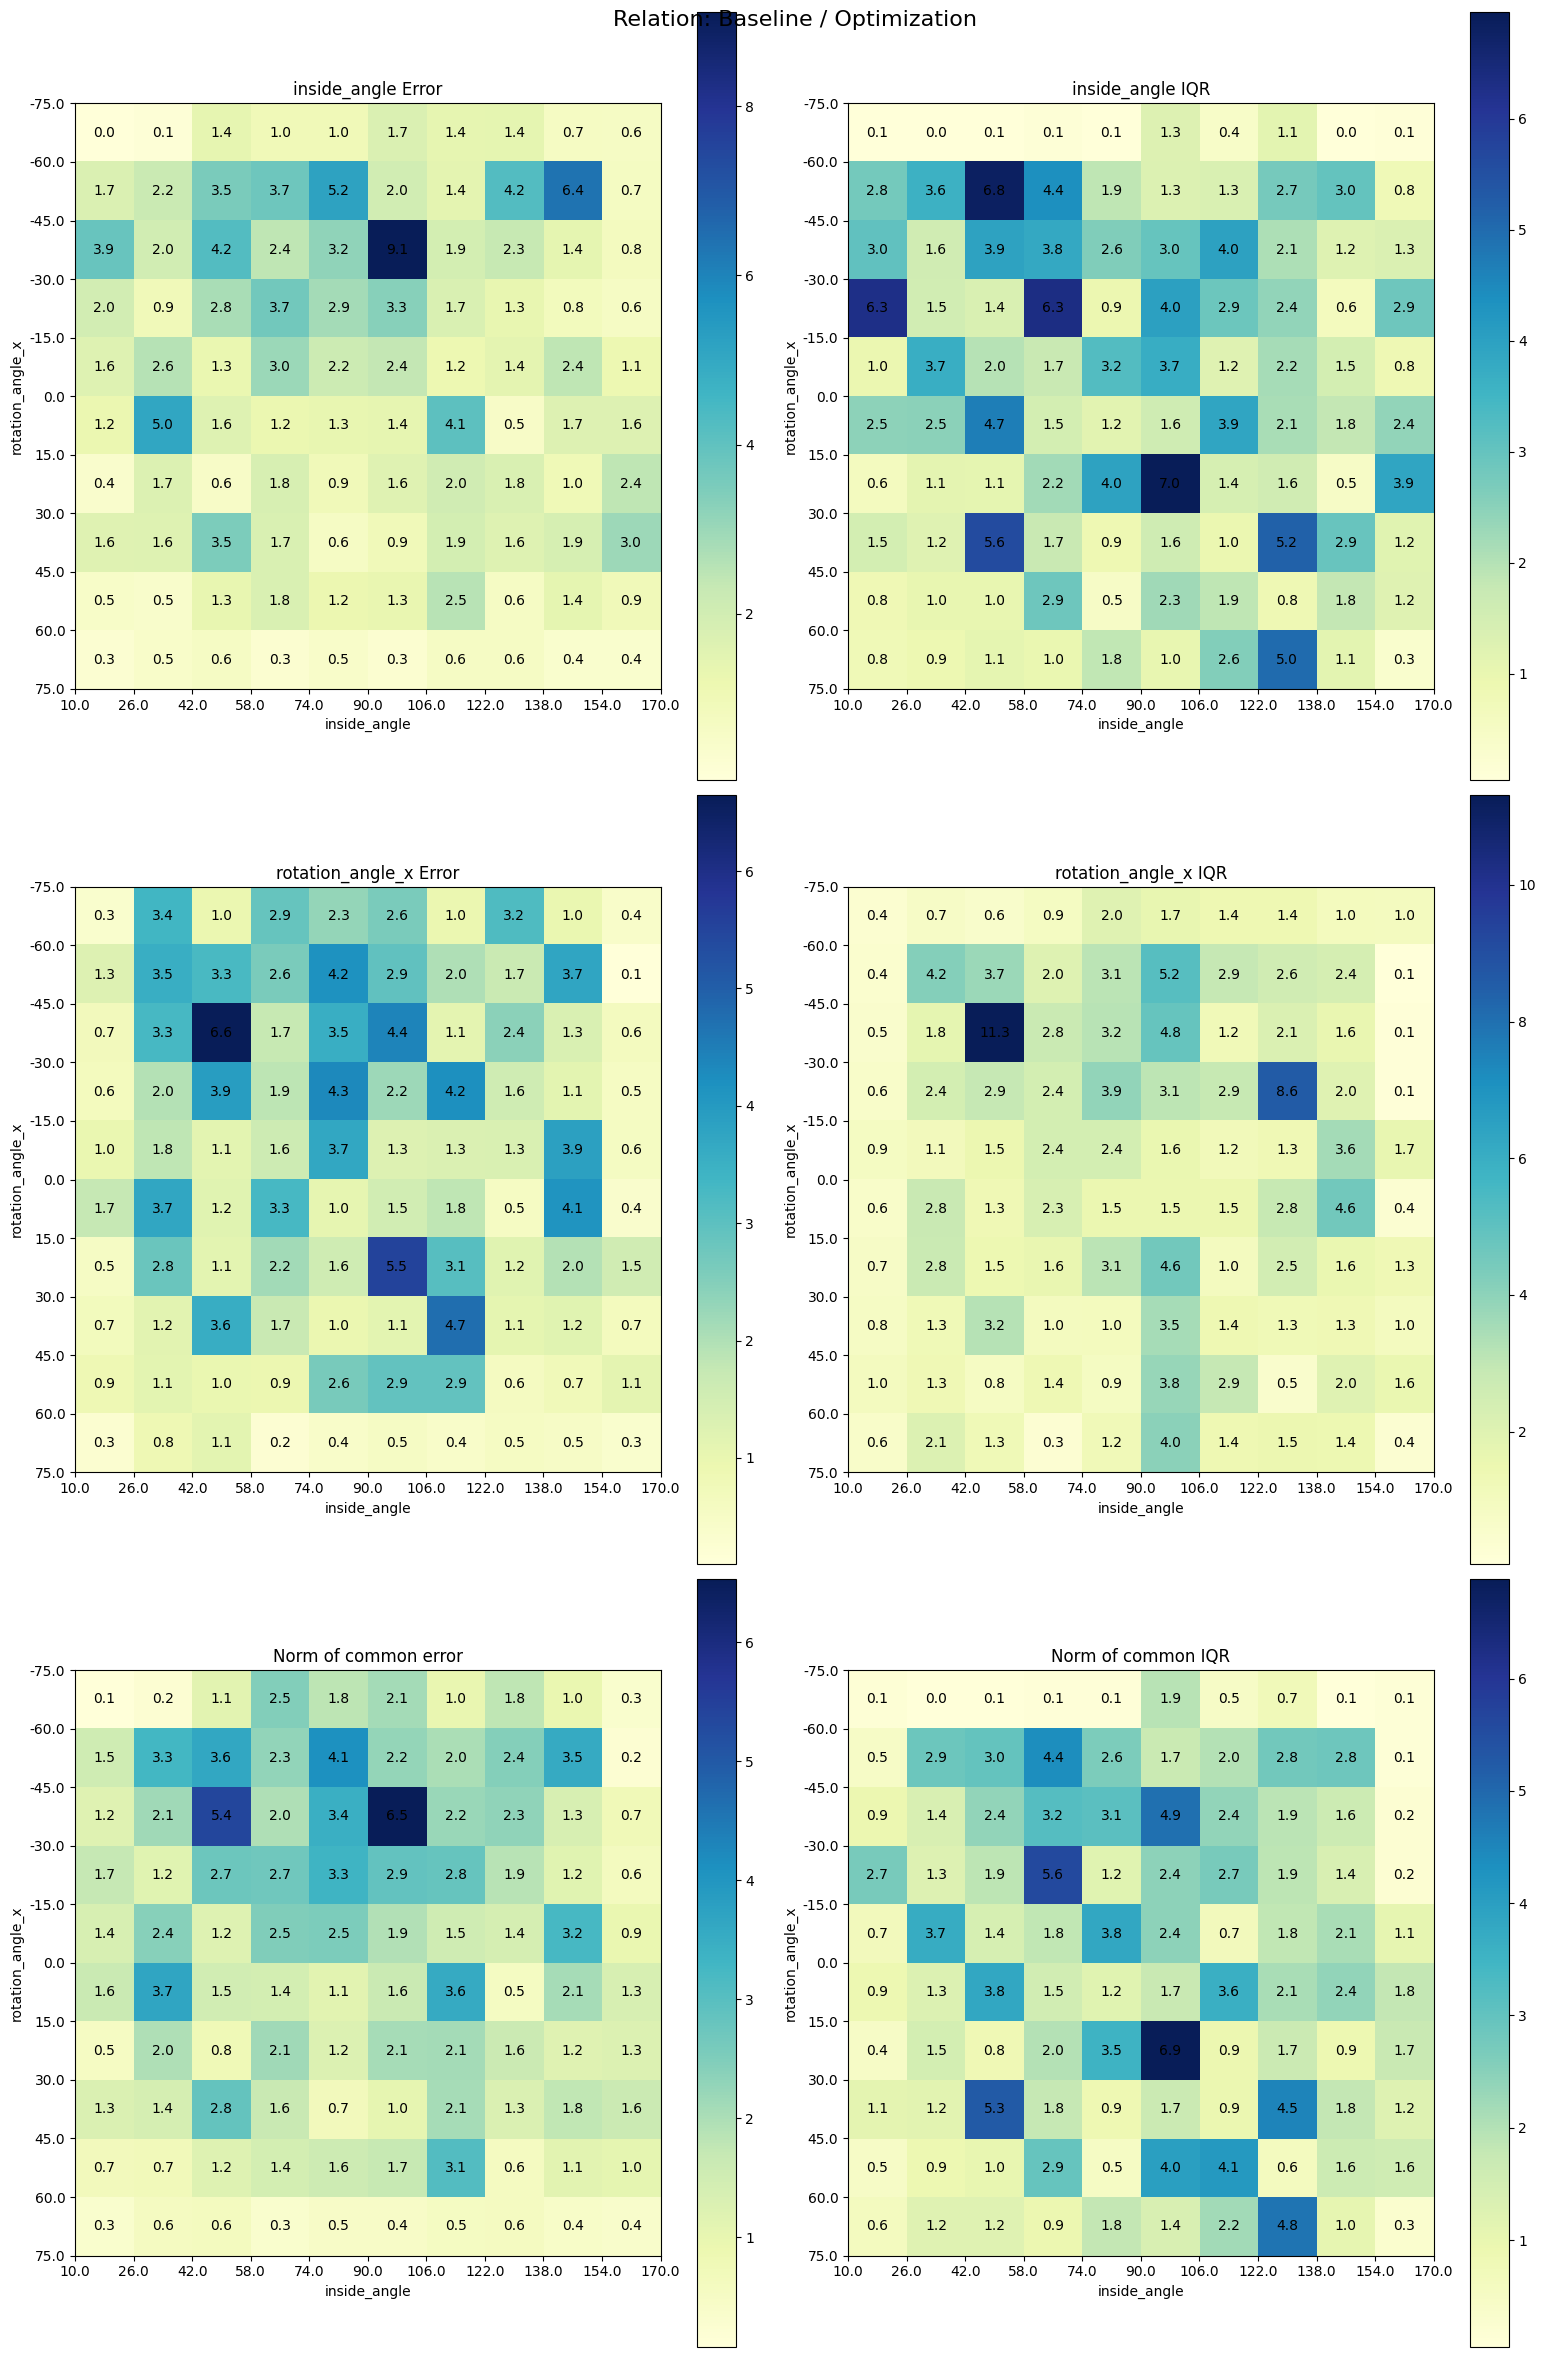

In [13]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/ch_angle_2d.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/ch_angle_2d_base.png", title="Baseline")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename="images/ch_angle_2d_rel.png", title="Relation: Baseline / Optimization")

28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


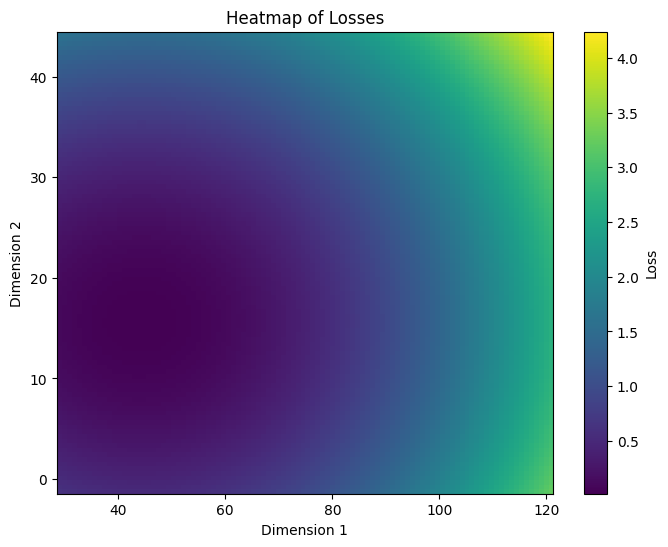

Finding neighbors: 885 ms , optimization: 167 ms
x_opt = [43.78595537 15.57136088], x_err = 0.01698502067082139
x_real = [45 15]
28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


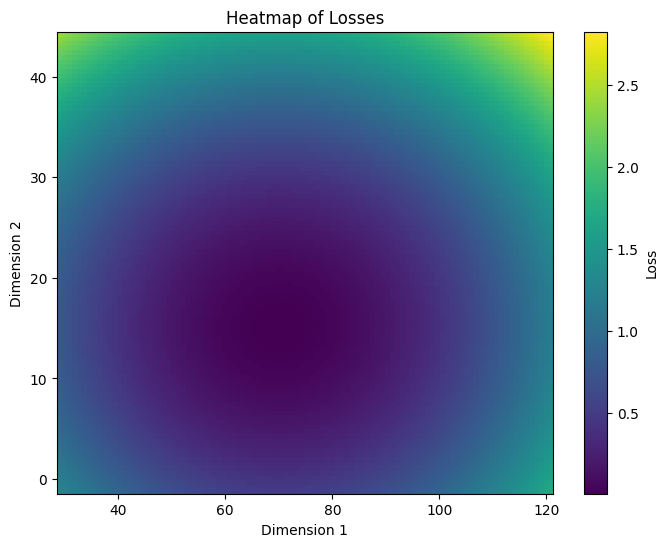

Finding neighbors: 707 ms , optimization: 162 ms
x_opt = [69.93192519 15.09417158], x_err = 0.004844861128824083
x_real = [70 15]


In [81]:
test_control_vars = np.array([[45, 15], [70, 15]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, simple_angles_gen.generate_angles_points,
                                                           noise_level=noise_level,
                                                           min_num_points=1000)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")